# Analysis

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()
MONTHS = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
DAYS = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
J_DAYS = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

In [2]:
#full_df = pd.read_pickle('full.pkl')
full_hour_df = pd.read_pickle('hour.pkl')
full_day_df = pd.read_pickle('day.pkl')
id_df = pd.read_pickle('id.pkl')

In [3]:
full_hour_df.head(1)

,total,id,count_reg,city,month,day,weekday,weekday_name,day_of_year,week,year,hour,consumption,ts,temperature,r_humidity,heat_index
0,199.341003,702552276,11,מודיעין מכבים רעות,1,1,5,Saturday,1,52,2022,0,5.037,2022-01-01,10.7,81.0,10.7


In [4]:
full_day_df.head(1)

,id,count_reg,city,month,day,weekday,weekday_name,day_of_year,week,year,total,temperature,r_humidity,heat_index
0,702552276,11,מודיעין מכבים רעות,1,1,5,Saturday,1,52,2022,199.341003,9.8875,84.25,9.8875


In [5]:
id_df.head(1)

,count_reg,no.,city,city_code_HHI,city_code_LAMAS,street,address,lat,lng
id,,,,,,,,,
702552276,11,32,מודיעין מכבים רעות,1932,1200,חרצית,חרצית 32 מודיעין מכבים רעות,31.905869,35.010933


In [6]:
print(id_df.index.nunique())

4877


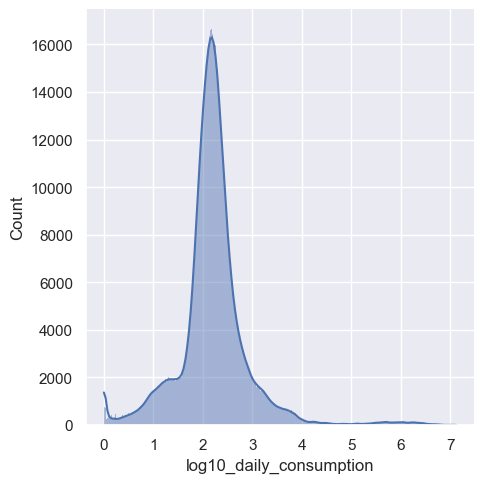

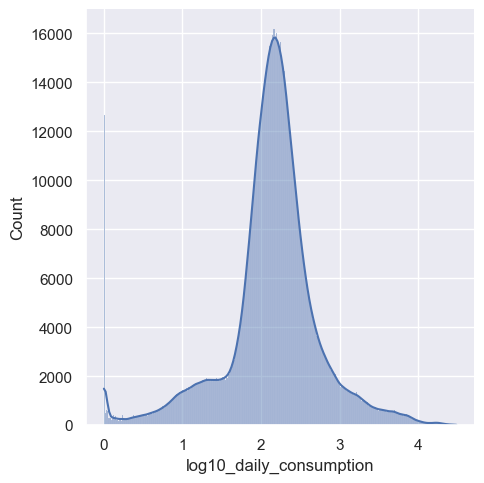

In [7]:
full_day_df['log10_daily_consumption'] = np.log10(full_day_df.total + 1)
sns.displot(full_day_df.log10_daily_consumption, kde=True)
bad_buildings = set(full_day_df[full_day_df.log10_daily_consumption > 4.5].id.unique())
full_day_df['overconsuming'] = full_day_df.id.map(lambda x: x in bad_buildings)

sns.displot(data=full_day_df[full_day_df.overconsuming == False], x='log10_daily_consumption', kde=True)

<Axes: xlabel='month', ylabel='total'>

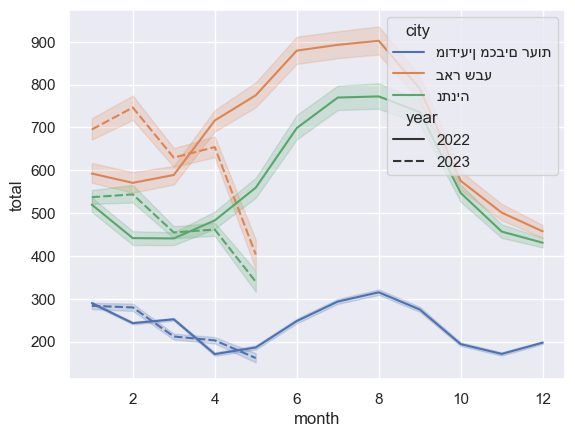

In [25]:
day_df = pd.DataFrame(full_day_df[full_day_df.overconsuming == False])
sns.lineplot(data=day_df, x='month', y='total', hue='city', style='year')
#day_df

In [26]:
day_df = day_df[day_df.year == 2022]
hour_df = pd.DataFrame(full_hour_df[(full_hour_df.id.map(lambda x: x not in bad_buildings)) & (full_hour_df.year == 2022)])

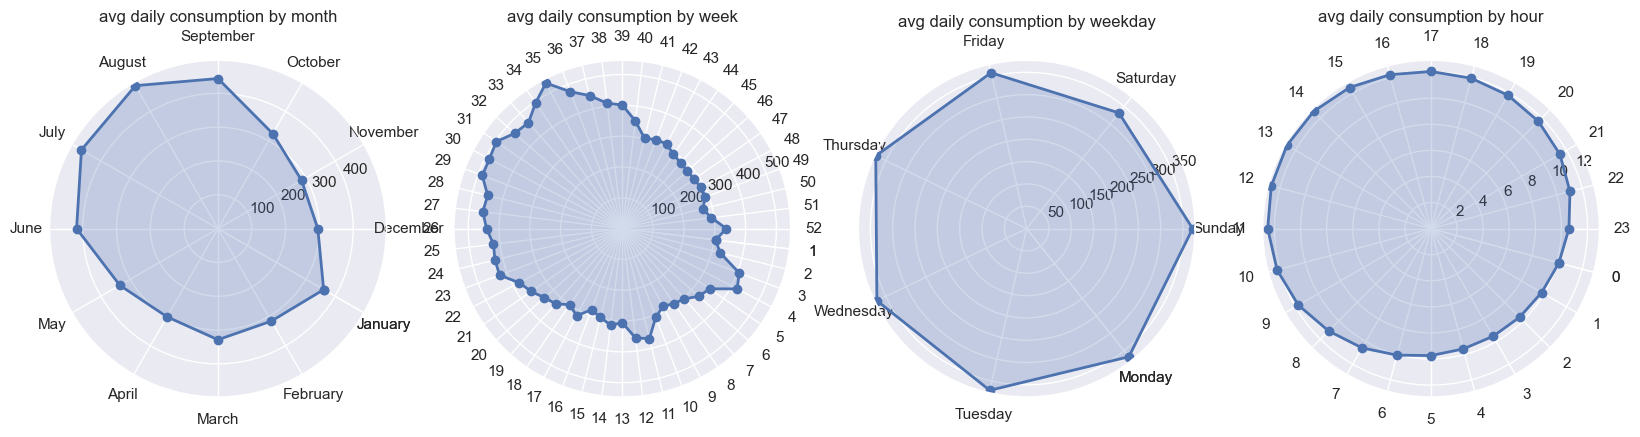

In [10]:

fig, axs = plt.subplots(figsize=(20, 5), nrows=1, ncols=4,
                            subplot_kw=dict(projection='polar'))
def radar_plt(stats, ax, title, labels=None):
    if labels is None:
        labels = np.arange(1, len(stats)+1)
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)[::-1] # Set the angle
    stats=np.concatenate((stats,[stats[0]]))  # Closed
    angles=np.concatenate((angles,[angles[0]]))  # Closed
    ax.plot(angles, stats, 'o-', linewidth=2)  # Draw the plot (or the frame on the radar chart)
    ax.fill(angles, stats, alpha=0.25)  #Fulfill the area
    ax.set_thetagrids(angles * 180/np.pi, np.concatenate((labels, labels[:1])))  # Set the label for each axis
    ax.set_title(title)  # Set the pokemon's name as the title
    #ax.set_rlim(0,250)
    ax.grid(True)


stats=day_df.groupby(day_df.month).mean(numeric_only=True).total.values
radar_plt(stats, axs[0], 'avg daily consumption by month', MONTHS)
stats=day_df.groupby(day_df.week).mean(numeric_only=True).total.values
radar_plt(stats, axs[1], 'avg daily consumption by week')
stats=day_df.groupby(day_df.weekday).mean(numeric_only=True).total.values
radar_plt(stats, axs[2], 'avg daily consumption by weekday', DAYS)
stats=hour_df.groupby(hour_df.hour).mean(numeric_only=True).consumption.values
radar_plt(stats, axs[3], 'avg daily consumption by hour', np.arange(0,24))

[Text(0.5, 1.0, 'consumption')]

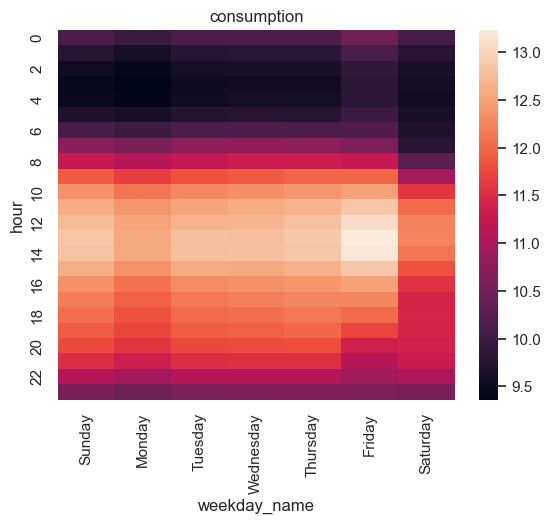

In [11]:
table = hour_df.groupby(['weekday_name', 'hour']).mean(numeric_only=True)['consumption'].reset_index().pivot(columns='weekday_name', index='hour', values='consumption')
sns.heatmap(table).set(title='consumption')

In [32]:
m = hour_df.city.unique()[0]
m

'מודיעין מכבים רעות'

[Text(0.5, 1.0, 'consumption')]

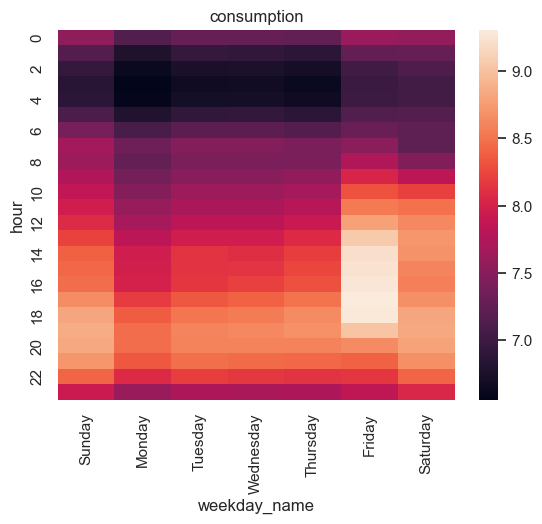

In [33]:
table = hour_df[hour_df.city == m].groupby(['weekday_name', 'hour']).mean(numeric_only=True)['consumption'].reset_index().pivot(columns='weekday_name', index='hour', values='consumption')
sns.heatmap(table).set(title='consumption')

[Text(0.5, 1.0, 'consumption')]

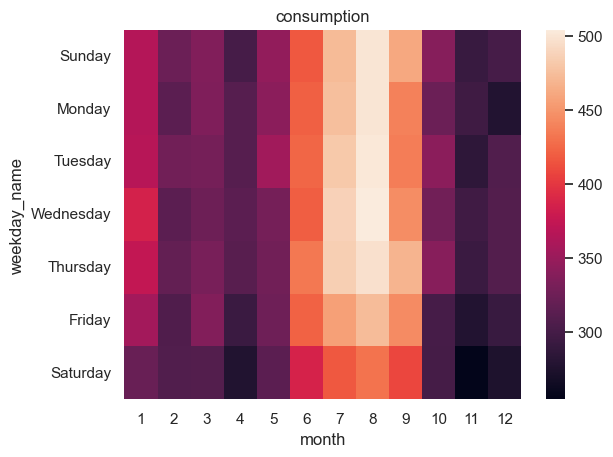

In [12]:
table = day_df.groupby(['weekday_name', 'month']).mean(numeric_only=True)['total'].reset_index().pivot(columns='month', index='weekday_name', values='total')
sns.heatmap(table).set(title='consumption')

<Axes: xlabel='weekday_name', ylabel='total'>

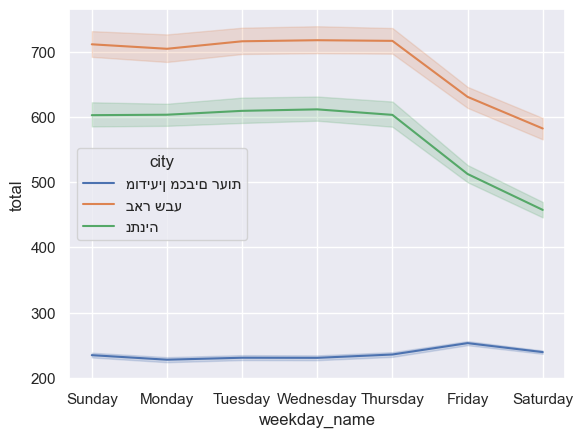

In [13]:
sns.lineplot(data=day_df, x='weekday_name', y='total', hue='city')

<Axes: xlabel='rounded_heat_index', ylabel='total'>

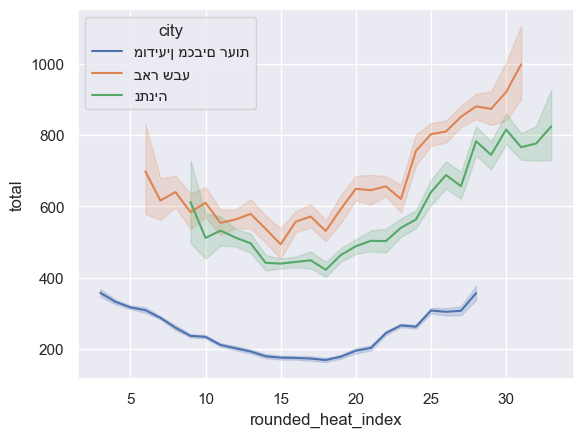

In [14]:
day_df['rounded_heat_index'] = day_df.heat_index.round(0)
sns.lineplot(data=day_df, x='rounded_heat_index', y='total', hue='city')

In [15]:
gr_df = day_df.groupby(['id', 'city']).mean()

C:\Users\Chapanin\AppData\Local\Temp\ipykernel_18124\2992466197.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gr_df = day_df.groupby(['id', 'city']).mean()


<Axes: xlabel='count_reg', ylabel='total'>

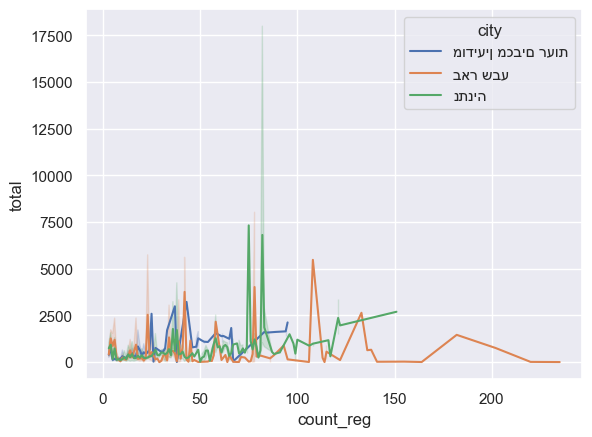

In [16]:
sns.lineplot(data=gr_df, x='count_reg', y='total', hue='city')

<Axes: xlabel='count_reg', ylabel='total'>

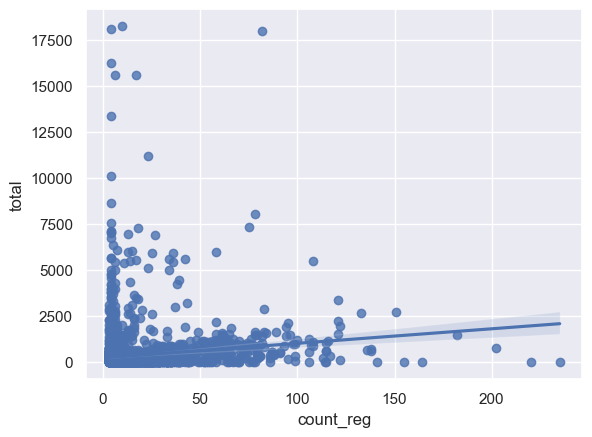

In [17]:
sns.regplot(data=gr_df, x='count_reg', y='total')

<Axes: xlabel='count_reg', ylabel='total'>

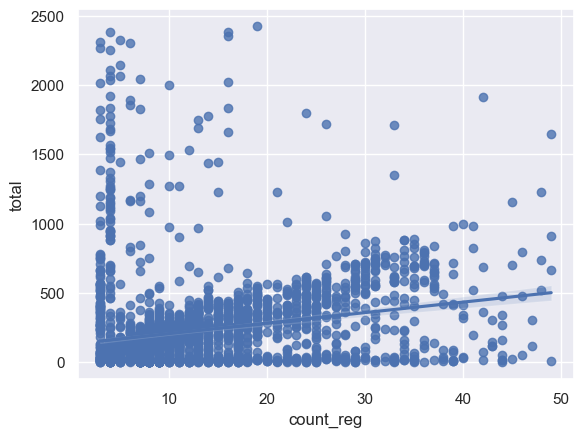

In [18]:
sns.regplot(data=gr_df[(gr_df.count_reg < 50) & (gr_df.total < 2500)], x='count_reg', y='total')

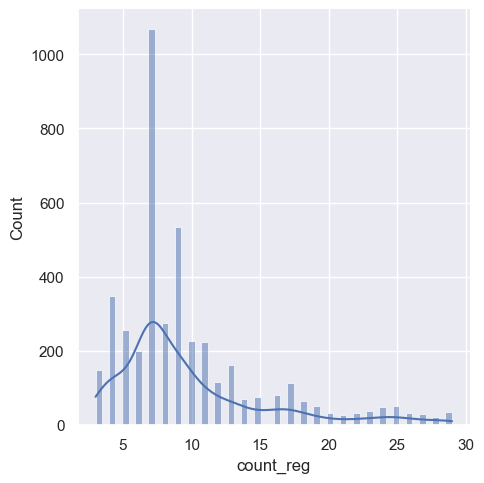

In [40]:
sns.displot(id_df[id_df.count_reg < 30].count_reg, kde=True)

# Outliers?

In [43]:
gr = day_df.groupby('day_of_year').mean().reset_index()
gr

C:\Users\Chapanin\AppData\Local\Temp\ipykernel_18124\2994219475.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gr = day_df.groupby('day_of_year').mean().reset_index()


,day_of_year,id,count_reg,month,day,weekday,week,year,total,temperature,r_humidity,heat_index,log10_daily_consumption,overconsuming
0,1,7.026649e+08,11.903678,1.0,1.0,5.0,52.0,2022.0,292.803528,11.005569,82.614899,11.005569,2.284796,0.0
1,2,7.026650e+08,11.921208,1.0,2.0,6.0,52.0,2022.0,318.691010,11.275719,82.882439,11.275719,2.271766,0.0
2,3,7.026652e+08,11.942733,1.0,3.0,0.0,1.0,2022.0,320.715179,10.529455,87.343475,10.529456,2.279025,0.0
3,4,7.026654e+08,11.942182,1.0,4.0,1.0,1.0,2022.0,336.988464,10.432407,82.605629,10.432407,2.306695,0.0
4,5,7.026654e+08,11.940628,1.0,5.0,2.0,1.0,2022.0,334.087189,11.364396,81.391670,11.364396,2.297219,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,361,7.027569e+08,14.208263,12.0,27.0,1.0,52.0,2022.0,356.271515,10.602884,82.134712,10.602884,2.189845,0.0
361,362,7.027571e+08,14.231874,12.0,28.0,2.0,52.0,2022.0,348.796356,11.080912,82.207390,11.080912,2.182863,0.0
362,363,7.027570e+08,14.249522,12.0,29.0,3.0,52.0,2022.0,349.037628,11.593529,73.464729,11.593530,2.175469,0.0
363,364,7.027571e+08,14.253467,12.0,30.0,4.0,52.0,2022.0,339.252502,11.342619,66.047791,11.342618,2.202643,0.0


In [47]:
WINDOW_SIZE = 5
temps = gr['temperature'].values
mean_temps = [temps[max(0, i-WINDOW_SIZE):i].mean() for i in range(len(temps))]
mean_temps[0] = temps[0]
for i in range(365):
    if temps[i] - mean_temps[i] > 5:
        print(i, temps[i], mean_temps[i])

53 17.52027 11.190402
60 17.099327 10.6390505
87 17.194231 9.34458
90 22.714542 14.532164
91 23.056408 16.97165
106 24.796038 14.774664
107 25.205132 17.248755
128 21.382769 15.626218
133 27.448526 19.72884
139 24.675482 19.570103


C:\Users\Chapanin\AppData\Local\Temp\ipykernel_18124\1825257070.py:3: RuntimeWarning: Mean of empty slice.
  mean_temps = [temps[max(0, i-WINDOW_SIZE):i].mean() for i in range(len(temps))]
